In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## Euclidean Distance

In [2]:
def euclidean_distance(p1, p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

## Algorithm

In [3]:
class KNN:
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        preds = [self._predict_class(x) for x in X]
        return np.array(preds)
        
    def _predict_class(self, point_data):
        dists = []
        
        # compute the distance
        for (point_X, class_y) in list(zip(self.X, self.y)):
            dist = euclidean_distance(point_X, point_data)
            
            dists.append((dist, class_y))
        
        # sort the distances
        dists.sort()
        
        # get the k closest data points
        neighbours = []
        for i in range(self.k):
            neighbours.append(dists[i][1])
        
        most_common = Counter(neighbours).most_common()
        return most_common[0][0]


## Data

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=4, n_classes=3, n_clusters_per_class=1, random_state=321)
X = X[:, [0,1]]

In [5]:
X.shape, y.shape

((200, 2), (200,))

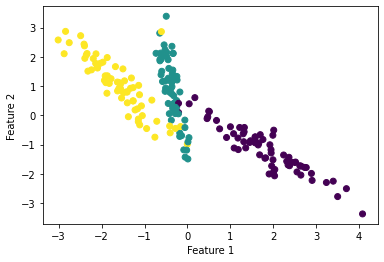

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

## Model

In [8]:
knn = KNN()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [9]:
def accuracy(y_pred, y_true):
    acc = 100*np.sum(y_pred == y_true) / len(y_true)
    return acc

In [10]:
acc = accuracy(preds, y_test)
print(f"Accuracy for k={knn.k}: {acc}%")

Accuracy for k=5: 95.0%


## k vs Accuracy 

In [11]:
k_values = [x for x in range(1, 30, 2)]
knn = KNN()
knn.fit(X_train, y_train)

accuracies = []
for k in k_values:
    knn.k = k
    preds = knn.predict(X_test)
    
    acc = accuracy(preds, y_test)
    accuracies.append(acc)

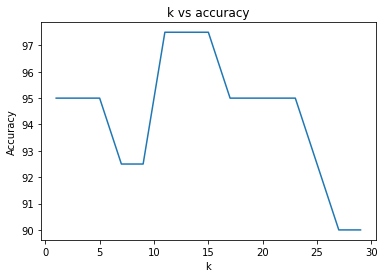

In [12]:
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs accuracy')
plt.show()

### Best k

In [13]:
## (accuracy, best k)
max(list(zip(accuracies, k_values)))

(97.5, 15)